# Setup Environment

In [1]:
# Upload file kaggle.json (API Key)
from google.colab import files
files.upload()

# Pindahkan API Key ke folder ~/.kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset "heart-attack-risk-assessment-dataset"
!kaggle datasets download fajobgiua/heart-attack-risk-assessment-dataset

# Ekstrak dataset ke folder 'dataset'
!unzip heart-attack-risk-assessment-dataset.zip -d dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/fajobgiua/heart-attack-risk-assessment-dataset
License(s): apache-2.0
Archive:  heart-attack-risk-assessment-dataset.zip
  inflating: dataset/Heart_Attack_Risk_Levels_Dataset.csv  


# Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

- NumPy: Untuk operasi numerik dan array.
- Matplotlib: Untuk membuat plot dasar.
- Pandas: Untuk manipulasi dan analisis data tabular.
- Seaborn: Untuk membuat visualisasi statistik yang lebih canggih dan menarik.
- %matplotlib inline: Untuk menampilkan plot Matplotlib di dalam notebook.

# Data Loading

In [3]:
data_path = '/content/dataset/Heart_Attack_Risk_Levels_Dataset.csv'
heartarl = pd.read_csv(data_path)
heartarl

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,positive,High,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate,Monitor closely and consult doctor
3,66,1,70,120,55,270.0,13.87,0.122,positive,High,Immediate medical attention
4,54,1,64,112,65,300.0,1.08,0.003,negative,Moderate,Monitor closely and consult doctor
...,...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,Moderate,Monitor closely and consult doctor
1315,66,1,84,125,55,149.0,1.33,0.172,positive,High,Immediate medical attention
1316,45,1,85,168,104,96.0,1.24,4.250,positive,High,Immediate medical attention
1317,54,1,58,117,68,443.0,5.80,0.359,positive,High,Immediate medical attention


Berdasarkan tabel di atas:
- Terdapat 1.319 baris dan 11 kolom.
- 8 kolom di antaranya merupakan data numerik dan 3 kolom lainnya merupakan data kategorikal.

# Exploratory Data Analysis

## Deskripsi Variabel

**Age:** Umur pasien dalam tahun.  

**Gender:** Gender yang direpresentasikan sebagai angka 1 untuk laki-laki dan 0 untuk perempuan.  

**Heart rate:** Detak jantung per menit.  

**Systolic blood pressure:** Tekanan pada arteri selama jantung berdetak.  

**Diastolic blood pressure:** Tekanan pada arteri di antara detak jantung.  

**Blood sugar:** Kadar glukosa darah (dalam mg/dL).

**CK-MB:** Tingkat enzim kreatin kinase-MB, biomarker jantung.  

**Troponin:** Protein yang dilepaskan ke dalam darah ketika otot jantung rusak.

**Result:** Klasifikasi kondisi pasien  
• positive = Pasien mengalami serangan jantung.  
• negative = Tidak terdeteksi mengalami serangan jantung.

**Risk_Level:** Penilaian kategoris risiko serangan jantung pasien berdasarkan indikator klinis.
Nilai yang mungkin termasuk:
• Low
• Moderate
• High

**Recommendation:** Saran medis atau gaya hidup berdasarkan kondisi dan tingkat risiko pasien.  
Rekomendasi umum meliputi:  
• Perhatian medis segera (untuk kasus berisiko tinggi atau yang sudah terkonfirmasi)  
• Pantau secara ketat dan konsultasikan dengan dokter (untuk kasus berisiko sedang)  
• Pertahankan gaya hidup sehat (untuk kasus berisiko rendah atau pencegahan)

In [4]:
heartarl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
 9   Risk_Level                1319 non-null   object 
 10  Recommendation            1319 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 113.5+ KB


 Berdasarkan hasil output di atas:
- Terdapat 3 kolom dengan tipe object, yaitu: Result, Risk Level, dan Recommendation. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 8 kolom numerik yang terdiri dari tipe data int64 yaitu: Age, Gender, Heart rate, Systolic blood pressure, dan Diastolic blood pressure; tipe data float64 yaitu: Blood sugar, CK-MB, dan Troponin.  
- Dalam studi kasus ini, kolom Risk Level akan menjadi target fitur.

In [5]:
heartarl.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## Menangani Missing Value

In [6]:
# Memeriksa Missing Value
heartarl.isnull().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0
Risk_Level,0


Berdasarkan hasil di atas, data pada setiap kolom tidak memiliki missing value.

## Menangani Outliers

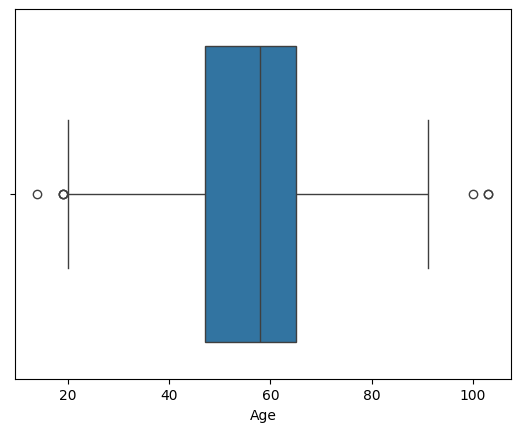

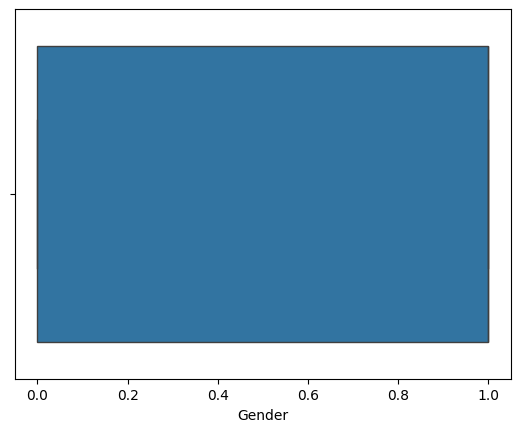

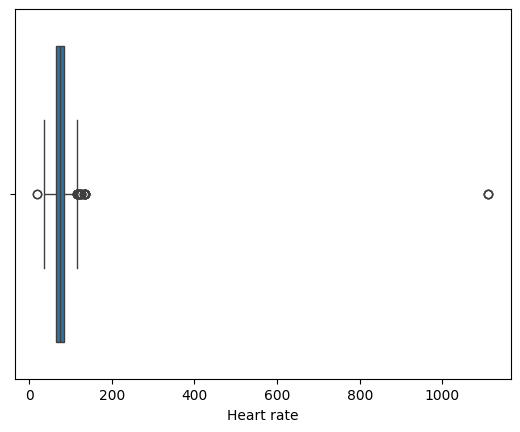

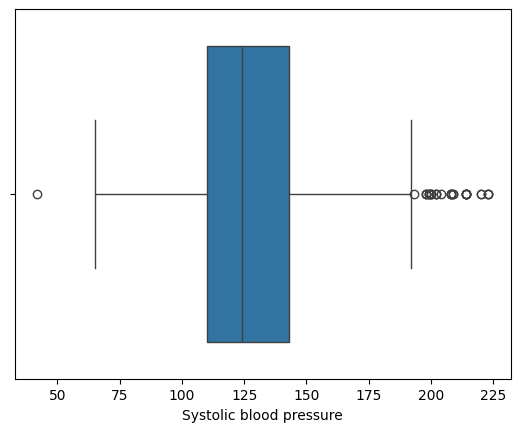

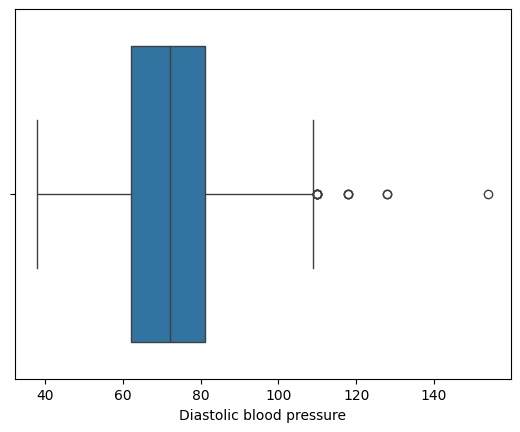

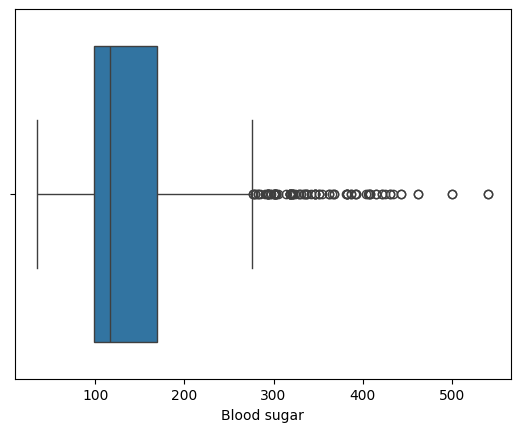

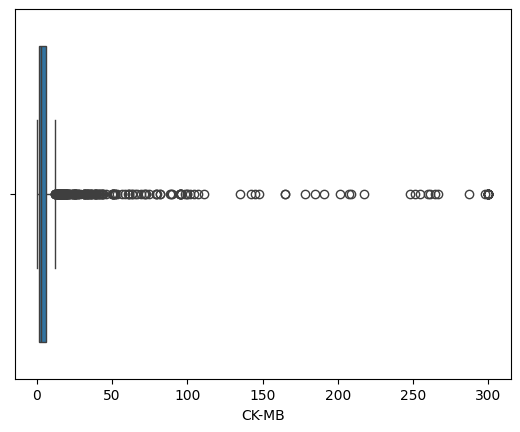

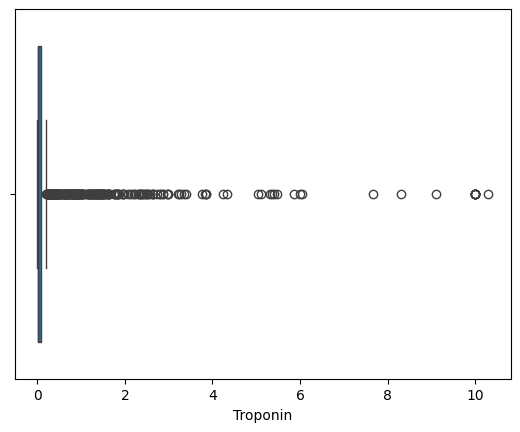

In [7]:
# Memeriksa outliers berdasarkan boxplot
# Ambil hanya kolom numerikal
numeric_cols = heartarl.select_dtypes(include='number').columns
for feature in heartarl[numeric_cols].keys():
  sns.boxplot(x=heartarl[feature])
  plt.show()

Berdaskarn boxplot yang ditampilkan maka ada beberapa langkah yang akan dilakukan untuk mengatasi masalah outliers pada masing-masing kolom:
- Menghapus outliers pada kolom `Age`, `Heart rate`, `Systolic blood pressure`, dan `Diastolic blood pressure` berdasarkan nilai kuartalnya.
- Memeriksa distribusi data `Blood sugar`, `CK-MB`, dan `Troponin` secara histogram kemudian membersihkan outliersnya.


### Age

In [8]:
# Membersihkan data Age
# Hitung Q1, Q3, dan IQR hanya untuk kolom Age
Q1 = heartarl['Age'].quantile(0.25)
Q3 = heartarl['Age'].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom Age
filter_outliers = ~((heartarl['Age'] < (Q1 - 1.5 * IQR)) |
                    (heartarl['Age'] > (Q3 + 1.5 * IQR)))
# Terapkan filter ke dataset asli (termasuk kolom selain Age)
heartarl = heartarl[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
heartarl.shape

(1312, 11)

Sel ini membersihkan data pada kolom 'Age' dari DataFrame heartarl dengan metode IQR (Interquartile Range).
- Hitung batas outlier Age: Menghitung kuartil 1 (Q1), kuartil 3 (Q3), dan IQR untuk kolom 'Age'. Batas bawah outlier adalah Q1 - 1.5\*IQR dan batas atas adalah Q3 + 1.5*IQR.
- Buat filter outlier: Membuat kondisi boolean untuk mengidentifikasi baris-baris di mana nilai 'Age' berada di dalam batas normal (tidak outlier).
- Terapkan filter: Menerapkan filter ini ke seluruh DataFrame heartarl, sehingga hanya baris-baris dengan nilai 'Age' yang tidak outlier yang dipertahankan.
- Cek ukuran data: Menampilkan dimensi (jumlah baris dan kolom) DataFrame heartarl setelah penghapusan outlier.

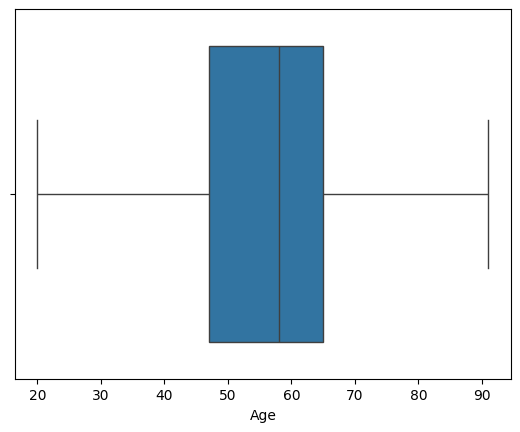

In [9]:
sns.boxplot(x=heartarl['Age'])
plt.show()

Berdasarkan gambar di atas, data rentang usia pada dataframe ini sekitar 20-90 tahun.

### Heart rate

In [10]:
# Membersihkan data `Heart rate`
heartarl = heartarl[~(heartarl['Heart rate']>200)]
heartarl.shape

(1309, 11)

Membersihkan outlier pada fitur `Heart rate` dengan angka lebih dari 200.

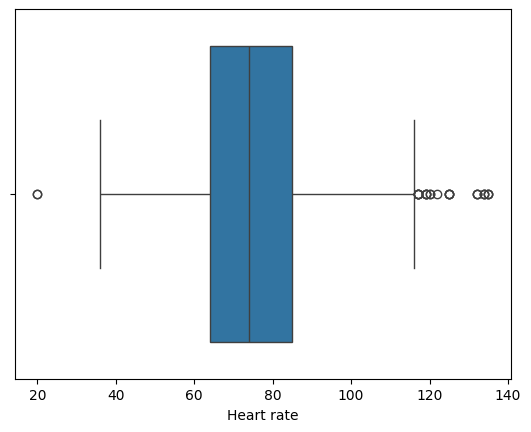

In [11]:
sns.boxplot(x=heartarl['Heart rate'])
plt.show()

Berdasarkan gambar di atas masih terdapat beberapa outliers terutama pada data heart rate lebih dari sekitar 115.

In [12]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom Heart rate
Q1 = heartarl['Heart rate'].quantile(0.25)
Q3 = heartarl['Heart rate'].quantile(0.75)
IQR = Q3 - Q1
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)

116.5
32.5


In [13]:
heartarl = heartarl[~((heartarl['Heart rate']>115) | (heartarl['Heart rate']<30))]

# Cek ukuran dataset setelah outlier dihapus
heartarl.shape

(1281, 11)

Membersihkan outlier dengan nilai heart rate lebih dari 115 dan kurang dari 30.

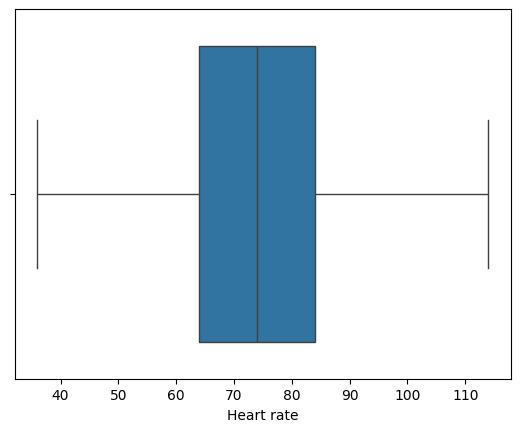

In [14]:
sns.boxplot(x=heartarl['Heart rate'])
plt.show()

Berdasarkan gambar di atas data pada fitur heart rate telah bersih

### Systolic blood pressure

In [15]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom Systolic blood pressure
Q1 = heartarl['Systolic blood pressure'].quantile(0.25)
Q3 = heartarl['Systolic blood pressure'].quantile(0.75)
IQR = Q3 - Q1
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)

195.0
59.0


In [16]:
heartarl = heartarl[~((heartarl['Systolic blood pressure']>190) | (heartarl['Systolic blood pressure']<50))]
heartarl.shape

(1245, 11)

Membersihkan outlier pada fitur `Systolic blood pressure` dengan nilai lebih dair 190 dan kurang dari 50.

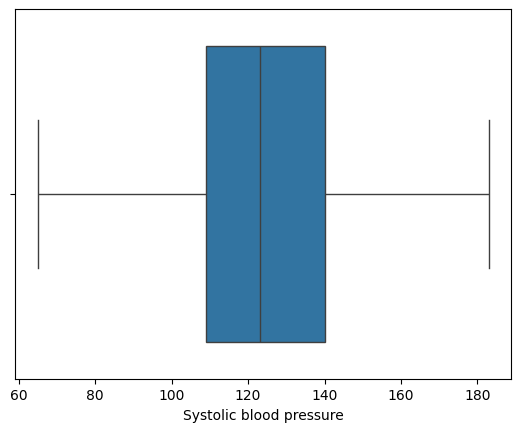

In [17]:
sns.boxplot(x=heartarl['Systolic blood pressure'])
plt.show()

Berdasarkan gambar di atas, data pada `Systolic blood pressure` telah bersih.

### Diastolic blood pressure

In [18]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom Diastolic blood pressure
Q1 = heartarl['Diastolic blood pressure'].quantile(0.25)
Q3 = heartarl['Diastolic blood pressure'].quantile(0.75)
IQR = Q3 - Q1
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)

107.0
35.0


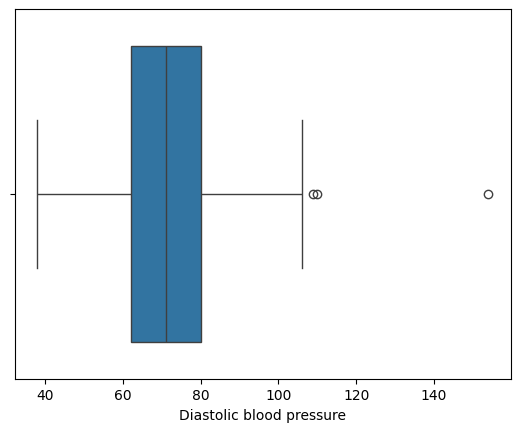

In [19]:
sns.boxplot(x=heartarl['Diastolic blood pressure'])
plt.show()

In [20]:
heartarl = heartarl[~(heartarl['Diastolic blood pressure']>107)]
heartarl.shape

(1242, 11)

Membersihkan outliers pada fitur `Diastolic blood pressure` dengan nilai lebih dari 107.

### Blood sugar

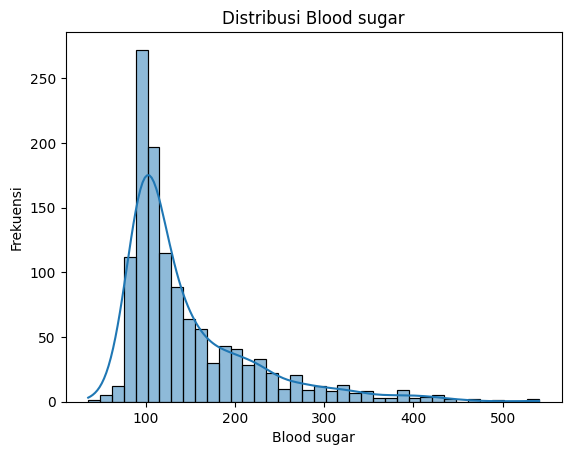

In [21]:
sns.histplot(heartarl['Blood sugar'], kde=True) # kde untuk menampilkan kurva kepadatan
plt.xlabel('Blood sugar')
plt.ylabel('Frekuensi')
plt.title('Distribusi Blood sugar')
plt.show()

Berdasarkan gambar di atas, distribusi data pada fitur `blood sugar` bertipe right skew. Sebagian besar data berada di rentang sekitar 0-350.

In [22]:
heartarl = heartarl[~(heartarl['Blood sugar']>350)]
heartarl.shape

(1205, 11)

### CK-MB

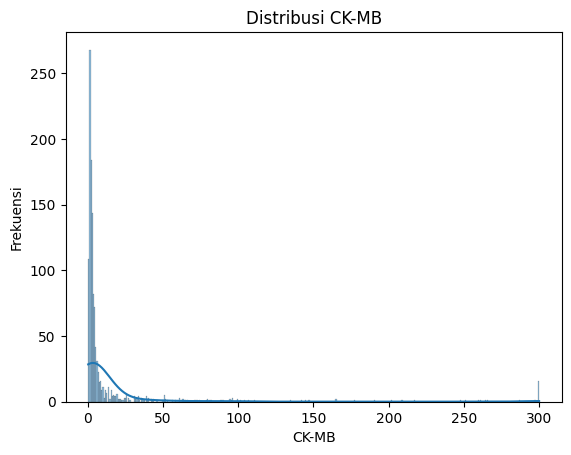

In [23]:
sns.histplot(heartarl['CK-MB'], kde=True) # kde untuk menampilkan kurva kepadatan
plt.xlabel('CK-MB')
plt.ylabel('Frekuensi')
plt.title('Distribusi CK-MB')
plt.show()

Berdasarkan distribusi data pada fitur `CK-MB`, sebagian besar data berada pada rentang sekitar 0-30.

In [24]:
heartarl = heartarl[~(heartarl['CK-MB']>30)]
heartarl.shape

(1094, 11)

### Troponin

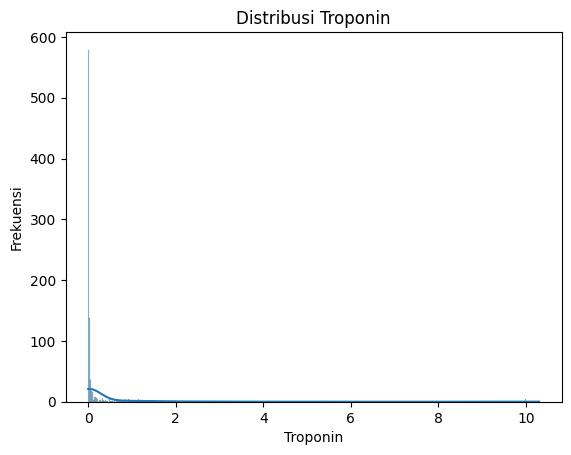

In [25]:
sns.histplot(heartarl['Troponin'], kde=True) # kde untuk menampilkan kurva kepadatan
plt.xlabel('Troponin')
plt.ylabel('Frekuensi')
plt.title('Distribusi Troponin')
plt.show()

Berdasarkan distribusi data pada fitur `Troponin`, sebagian besar data berada di rentang sekitar 0.

In [26]:
heartarl[(heartarl['Troponin']>0.1)].shape

(255, 11)

Terdapat 255 baris data dengan nilai troponin di angka lebih dari 0,1. Angka ini relatif sangat sedikit jika dibandingkan dengan data keseluruhan oleh karean itu angka ini akan menjadi threshold.

In [27]:
heartarl = heartarl[~(heartarl['Troponin']>0.1)]
heartarl.shape

(839, 11)

Setelah dilakukan pembersihan outliers pada masing-masing kolom, jumlah datanya sebanyak 839 baris dari yang sebelumnya 1319 baris.

## Univariate Analysis

          jumlah sampel  persentase
Result                             
negative            463        55.2
positive            376        44.8


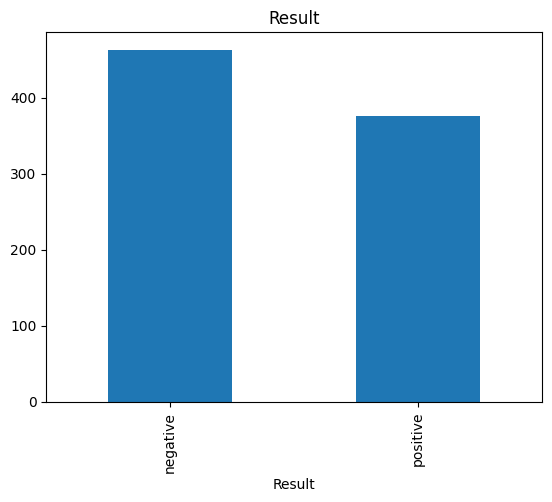

In [28]:
categorical_features = ['Result', 'Recommendation', 'Risk_Level']

feature = categorical_features[0]
count = heartarl[feature].value_counts()
percent = 100*heartarl[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan gambar di atas:
- Terdapat 463 sampel dengan hasil "negative" (pasien tidak terdeteksi mengalami serangan jantung)
- Terdapat 376 sampel dengan hasil "positive" (pasien pernah mengalami serangan jantung)

                                    jumlah sampel  persentase
Recommendation                                               
Immediate medical attention                   376        44.8
Maintain healthy lifestyle                    268        31.9
Monitor closely and consult doctor            195        23.2


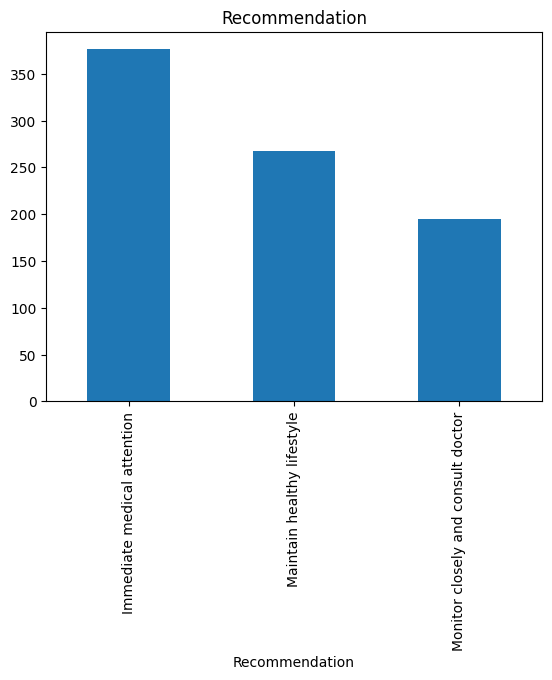

In [29]:
feature = categorical_features[1]
count = heartarl[feature].value_counts()
percent = 100*heartarl[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan gambar di atas:
- Terdapat 376 sampel dengan hasil "Immediate medical attention" (Pasien memerlukan perhatian medis segera untuk kasus berisiko tinggi atau yang sudah terkonfirmasi)
- Terdapat 268 sampel dengan hasil "Maintain healthy lifestyle" (Pasien perlu mempertahankan gaya hidup sehat untuk kasus berisiko rendah atau pencegahan)
- Terdapat 195 sampel dengan hasil "Monitor closely and consult doctor" (Pasien perlu dipantau secara ketat dan konsultasikan dengan dokter untuk kasus berisiko sedang)

            jumlah sampel  persentase
Risk_Level                           
High                  376        44.8
Low                   268        31.9
Moderate              195        23.2


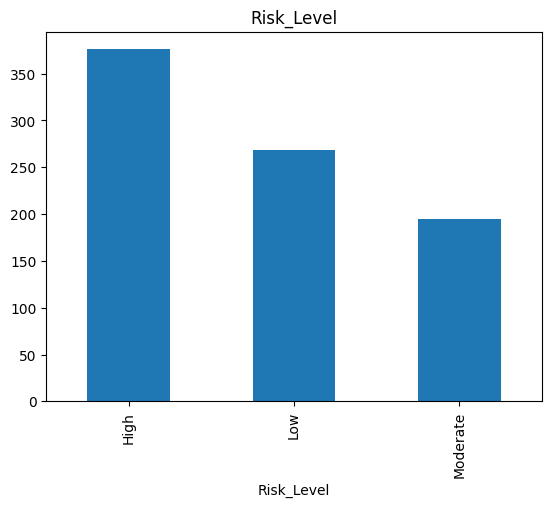

In [30]:
feature = categorical_features[2]
count = heartarl[feature].value_counts()
percent = 100*heartarl[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan gambar di atas:
- Terdapat 376 sampel dengan hasil "High" (Risiko tinggi mengalami serangan jantung)
- Terdapat 268 sampel dengan hasil "Low" (Risiko rendah mengalami serangan jantung)
- Terdapat 195 sampel dengan hasil "Moderate" (Risiko sedang mengalami serangan jantung)

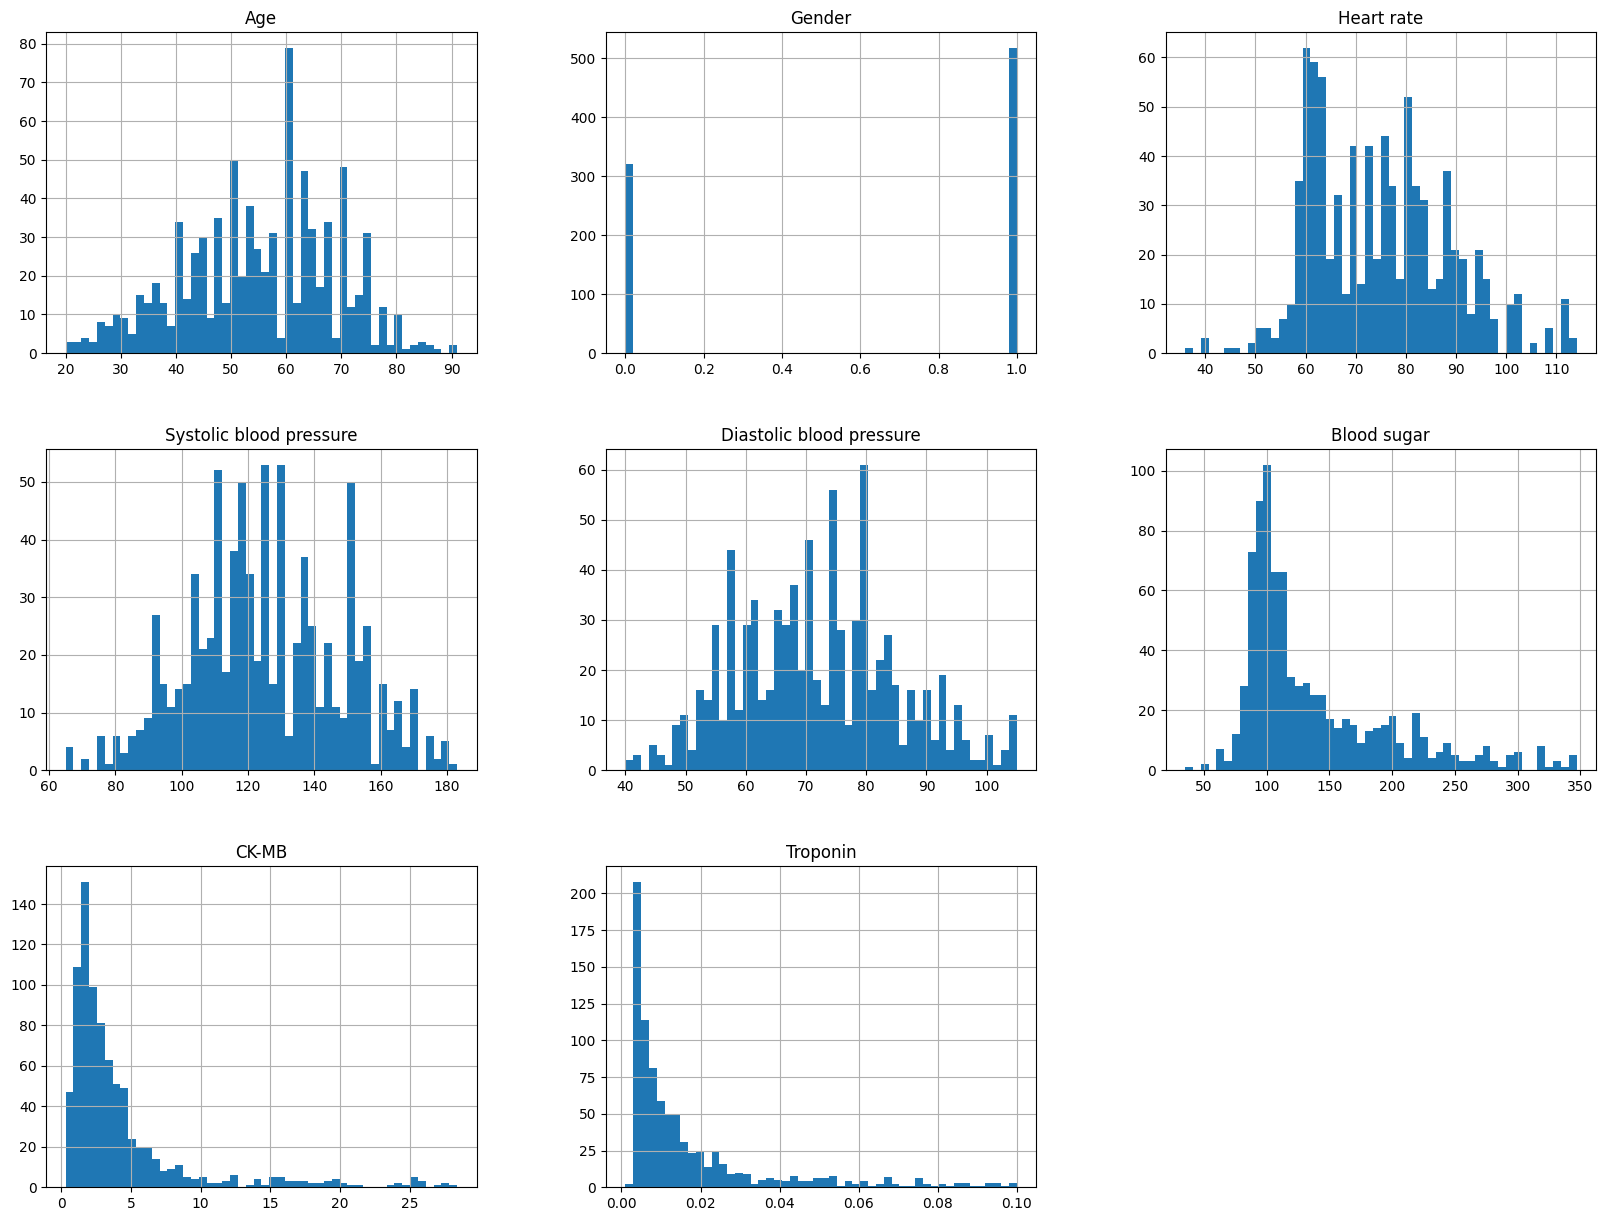

In [31]:
heartarl.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

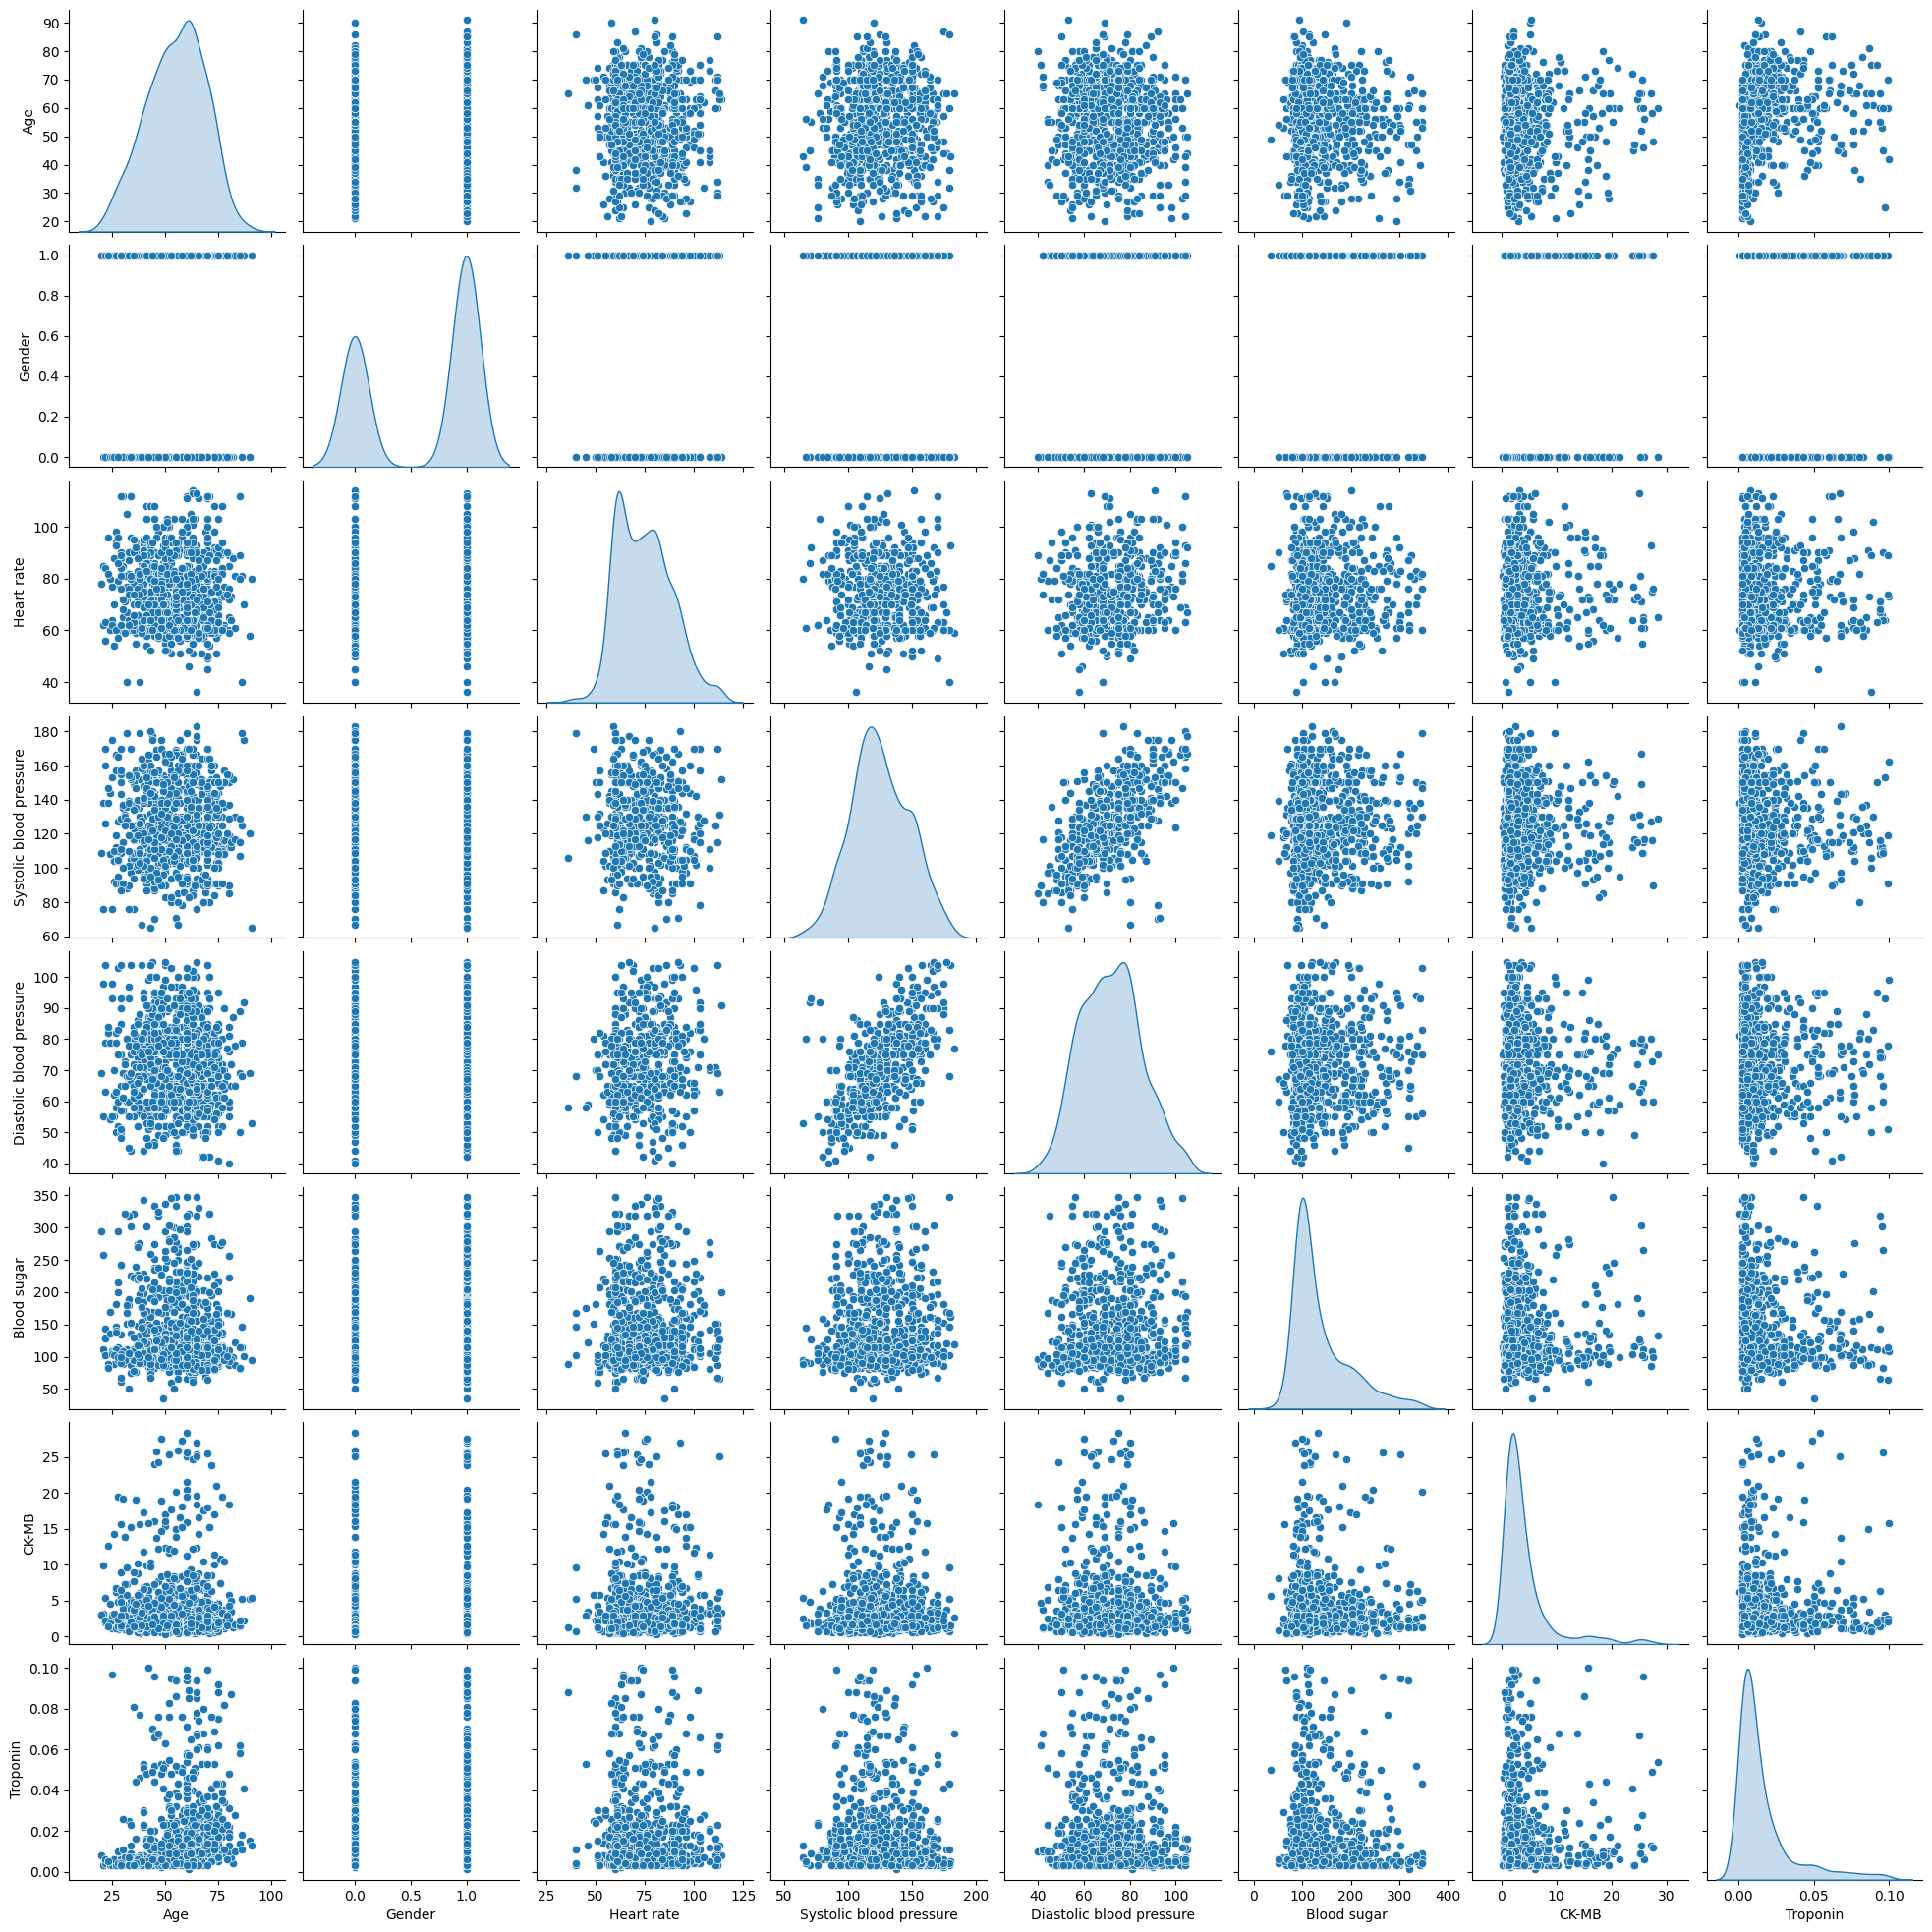

In [32]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(heartarl, diag_kind = 'kde')

Gambar di atas menunjukkan hubungan antara 2 variabel pada masing-masing fitur. Jika melihat secara kasat mata maka dapat terlihat bahwa fitur `Systolic blood pressure` dan `Diastolic blood pressure` berkorelasi positif.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

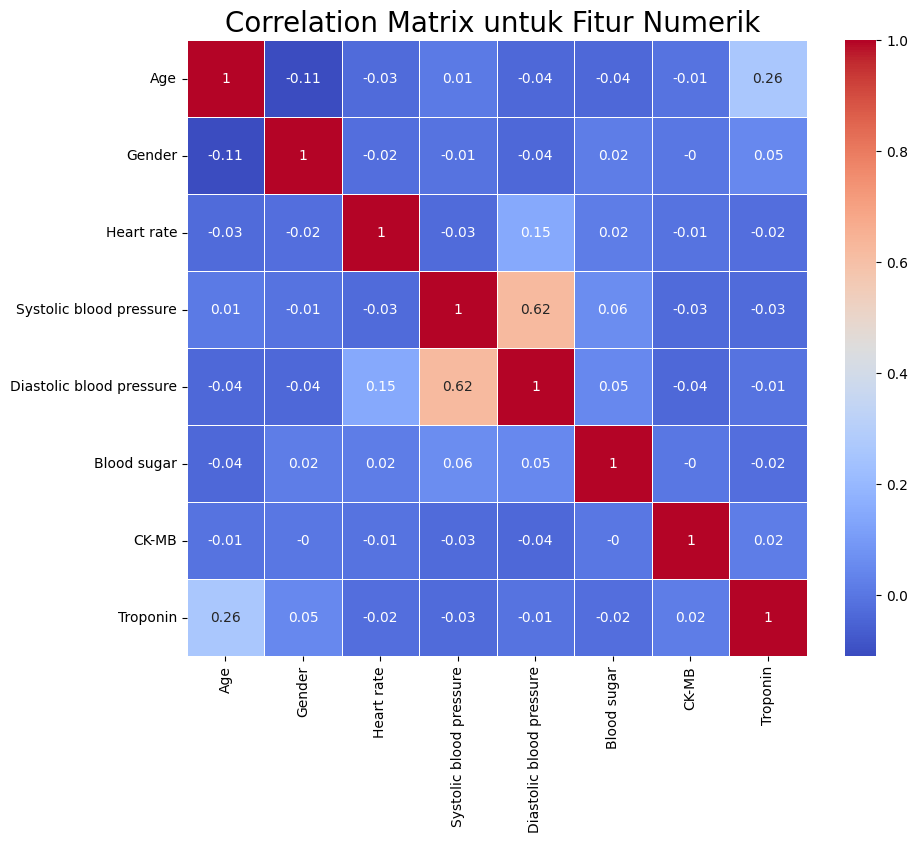

In [33]:
numerical_features = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
plt.figure(figsize=(10, 8))
correlation_matrix = heartarl[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan hasil korelasi matriksnya:
- Fitur `Systolic blood pressure` berkorelasi kuat dengan `Diastolic blood pressure` (>0.5)

# Data Preparation

## Encoding Target Variabel

In [34]:
# Mengubah data kategorikal menjadi data numerik
heartarl['Risk_Level'] = heartarl['Risk_Level'].map({'High': 2, 'Moderate': 1, 'Low': 0})

Fitur `Risk_Level` akan menjadi target variabel dan karena datanya memiliki makna pada setiap kategorinya maka dilakukan encoding dengan ordinal encoding.

## Reduksi Dimensi dengan PCA

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(heartarl[['Systolic blood pressure', 'Diastolic blood pressure']])
princ_comp = pca.transform(heartarl[['Systolic blood pressure', 'Diastolic blood pressure']])

Fitur `Systolic blood pressure` dan `Diastolic blood pressure` yang berkorelasi kuat akan direduksi dimensinya.

In [36]:
pca.explained_variance_ratio_.round(3)

array([0.865, 0.135])

Berdasarkan informasi tersebut, maka saya akan menggunakan nilai PCA pertama yang merepresentasikan rasio variance di angka 86,5%.

In [37]:
pca = PCA(n_components=1, random_state=123)
pca.fit(heartarl[['Systolic blood pressure', 'Diastolic blood pressure']])
heartarl['blood_pressure'] = pca.transform(heartarl.loc[:, ('Systolic blood pressure', 'Diastolic blood pressure')]).flatten()
heartarl.drop(['Systolic blood pressure', 'Diastolic blood pressure'], axis=1, inplace=True)

Pada tahap ini, fitur `Systolic blood pressure` dan `Diastolic blood pressure` direduksi menjadi 1 dimensi dengan nama `blood pressure`.

In [38]:
heartarl.head(3)

,Age,Gender,Heart rate,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation,blood_pressure
0,63,1,66,160.0,1.80,0.012,negative,1,Monitor closely and consult doctor,36.219215
2,56,1,64,270.0,1.99,0.003,negative,1,Monitor closely and consult doctor,33.818264
4,54,1,64,300.0,1.08,0.003,negative,1,Monitor closely and consult doctor,-14.973043


## Train-Test-Split

In [39]:
# Drop fitur yang tidak digunakan
heartarl.drop(['Result', 'Recommendation'], axis=1, inplace=True)

Dalam melakukan proses training model untuk memprediksi level risiko pasien terkena serangan jantung, fitur `Result` dan `Recommendation` tidak digunakan karena hasilnya sudah diwakilkan dengan target variabel yaitu `Risk_Level`.

In [ ]:
from sklearn.model_selection import train_test_split

X = heartarl.drop(["Risk_Level"],axis =1)
y = heartarl["Risk_Level"]

# 1. Pisahkan 20% untuk set pengujian
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Pisahkan 25% dari sisanya (80%) untuk set validasi
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=(0.25/0.8), random_state=42, stratify=y_train_val
)

Label (output) yang digunakan adalah `Risk_Level` dan sisanya merupakan fitur. Selanjutnya dilakukan proses pemisahan data training, data validation, dan data testing. Tujuan dari pembagian data ini adalah untuk proses training model, fine tuning hyperparameter, dan juga evaluasi model.

In [57]:
print(f"Ukuran set pelatihan: {X_train.shape}, {y_train.shape}")
print(f"Ukuran set validasi: {X_val.shape}, {y_val.shape}")
print(f"Ukuran set pengujian: {X_test.shape}, {y_test.shape}")

Ukuran set pelatihan: (503, 7), (503,)
Ukuran set validasi: (168, 7), (168,)
Ukuran set pengujian: (168, 7), (168,)


- Data training yang digunakan merupakan 60% dari total data keseluruhan yaitu: 503 sampel.
- Data validation yang digunakan merupakan 20% dari total data keseluruhan yaitu: 168 sampel.
- Data testing yang digunakan merupakan 20% dari total data keseluruhan yaitu: 168 sampel.

## Standarisasi

In [58]:
numerical_features = ['Age', 'Gender', 'Heart rate', 'Blood sugar', 'CK-MB', 'Troponin', 'blood_pressure']

Pada proses ini diinisiasi fitur-fitur yang akan distandarisasi yaitu fitur-fitur numerik pada dataframe ini. Proses ini penting dilakukan agar model dapat melakukan training dan mendapatkan hasil akurasi yang lebih optimal terutama pada model-model yang berbasis jarak.

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,Gender,Heart rate,Blood sugar,CK-MB,Troponin,blood_pressure
715,0.390377,-1.267366,-1.266607,-0.400504,1.023779,0.242519,-0.249405
592,-0.347263,0.789038,-1.339972,2.570174,0.101750,-0.699465,0.529021
494,-1.306195,0.789038,-1.193242,-0.284332,-0.741059,-0.699465,-0.011197
216,0.906725,0.789038,-0.092764,-0.632847,-0.098500,2.702144,-0.807721
597,-1.896307,0.789038,0.934349,-0.533272,0.299799,-0.699465,1.335631


Data numerik discaling menggunakan `StandardScaler()` yang mengubah rentang data menjadi memiliki nilai mean 0 dan standar deviasi 1.

In [60]:
X_train[numerical_features].describe().round(4)

,Age,Gender,Heart rate,Blood sugar,CK-MB,Troponin,blood_pressure
count,503.0000,503.0000,503.0000,503.0000,503.0000,503.0000,503.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000
std,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010,1.0010
min,-2.4864,-1.2674,-2.1470,-1.2967,-0.8421,-0.8041,-2.5895
25%,-0.7161,-1.2674,-0.8998,-0.6826,-0.5595,-0.6471,-0.6668
50%,0.0216,0.7890,-0.0928,-0.4171,-0.3296,-0.3855,-0.0862
75%,0.7592,0.7890,0.6409,0.3629,0.1106,0.1902,0.7624
max,2.6771,0.7890,2.8418,3.4498,5.0970,4.2198,2.4958


Berdasarkan deskripsi statistik seluruh fitur telah berhasil distandarisasi karena nilai mean-nya sudah 0 dan standar deviasinya 1.

# Model Development

Model yang akan digunakan pada kasus ini adalah Extreme Gradient Boosting (XGB). XGB adalah implementasi dari teknik gradient boosting. Boosting adalah metode ensemble learning di mana beberapa model yang lebih lemah digabungkan secara berurutan untuk menciptakan model yang lebih kuat dan akurat. Kata "Extreme" dalam XGBoost mengacu pada beberapa peningkatan dan optimasi signifikan yang membuatnya lebih unggul daripada implementasi gradient boosting standar. Model ini dipilih karena populer digunakan dalam masalah klasifikasi tabular dan mampu memberikan performa akurasi yang tinggi. Selain itu model ini memiliki regularisasi L! dan L2 bawaan yang dapat membantu mencegah overfitting.

In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

In [71]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 3
}

evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=True)

[0]	train-mlogloss:0.72874	eval-mlogloss:1.07715
[1]	train-mlogloss:0.51694	eval-mlogloss:1.13091
[2]	train-mlogloss:0.37843	eval-mlogloss:1.22167
[3]	train-mlogloss:0.28403	eval-mlogloss:1.33365
[4]	train-mlogloss:0.21773	eval-mlogloss:1.45863
[5]	train-mlogloss:0.16914	eval-mlogloss:1.59159
[6]	train-mlogloss:0.13380	eval-mlogloss:1.72916
[7]	train-mlogloss:0.10666	eval-mlogloss:1.86888
[8]	train-mlogloss:0.08616	eval-mlogloss:2.00963
[9]	train-mlogloss:0.07056	eval-mlogloss:2.14833
[10]	train-mlogloss:0.05859	eval-mlogloss:2.28512


In [72]:
y_pred = model.predict(dtest).astype(int)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada set pengujian: {accuracy:.4f}")

Akurasi pada set pengujian: 0.4464


Berdasarkan hasil di atas, tampaknya model XGB masih belum mendapatkan akurasi yang optimal. Hal ini bisa dilihat dari akurasi pada set pengujiannya yang rendah yaitu 44,64%. Dalam rangka meningkatkan akurasi model XGB, saya akan melakukan proses hyperparameter tuning menggunakan metode GridSearch.

In [74]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb

# Definisikan parameter grid yang ingin diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metrik evaluasi
    cv=StratifiedKFold(n_splits=5),  # Strategi cross-validation
    verbose=1,
    n_jobs=-1  # Gunakan semua core CPU yang tersedia
)

# Latih grid search pada data pelatihan penuh
grid_search.fit(X_train_val, y_train_val)

# Hasil terbaik
print("Hasil Grid Search Terbaik:")
print(f"Skor Terbaik: {grid_search.best_score_:.4f}")
print(f"Parameter Terbaik: {grid_search.best_params_}")

# Model terbaik yang ditemukan
best_model = grid_search.best_estimator_

# Evaluasi model terbaik pada set pengujian
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nAkurasi pada set pengujian (setelah tuning): {accuracy_tuned:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Hasil Grid Search Terbaik:
Skor Terbaik: 0.9657
Parameter Terbaik: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

Akurasi pada set pengujian (setelah tuning): 0.9702


Setelah dilakukan proses hyperparameter tuning, model XGB mendapatkan skor akurasi pada set pengujian mencapai 97,02%. Hasil ini jauh lebih baik jika dibandingkan dengan sebelum proses tuning.

# Evaluasi Model

Pada kasus klasifikasi, metrik yang akan digunakan adalah precision, recall, dan f-1 score. Metrik ini digunakan untuk menguji performa model dalam melakukan klasifikasi pada masing-masing label atau kelas baik untuk Risk_Level: 2-High, 1-Moderate, dan 0-Low. Selain itu, confusion matrix juga digunakan untuk memperlihatkan seberapa baik model dalam memprediksi kelas dan kesalahan prediksinya.

In [75]:
accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Akurasi pada set pengujian: {accuracy:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

Akurasi pada set pengujian: 0.9702

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.97      0.97      0.97        39
           2       0.99      0.97      0.98        75

    accuracy                           0.97       168
   macro avg       0.97      0.97      0.97       168
weighted avg       0.97      0.97      0.97       168


Confusion Matrix:
[[52  1  1]
 [ 1 38  0]
 [ 2  0 73]]


Berdasarkan Laporan Klasifikasi (Classification Report):  
**Kelas 0 (Low):**  
- **Presisi (Precision)**: 0.95 - Dari semua pasien yang diprediksi memiliki risiko rendah, 95% di antaranya memang benar memiliki risiko rendah.  
- **Recall (Recall):** 0.96 - Dari semua pasien yang sebenarnya memiliki risiko rendah, model berhasil mengidentifikasi 96% di antaranya.  
- **F1-Score:** 0.95 - F1-score adalah rata-rata harmonik presisi dan recall. Nilai 0.95 menunjukkan keseimbangan yang baik antara presisi dan recall untuk kelas risiko rendah.  
- **Support:** 54 - Ada 54 pasien dengan risiko rendah dalam set pengujian.  

**Kelas 1 (Moderate):**  
- **Presisi (Precision):** 0.97 - Dari semua pasien yang diprediksi memiliki risiko sedang, 97% di antaranya memang benar memiliki risiko sedang.  
- **Recall (Recall):** 0.97 - Dari semua pasien yang sebenarnya memiliki risiko sedang, model berhasil mengidentifikasi 97% di antaranya.  
- **F1-Score:** 0.97 - Nilai 0.97 menunjukkan keseimbangan yang sangat baik antara presisi dan recall untuk kelas risiko sedang.  
- **Support:** 39 - Ada 39 pasien dengan risiko sedang dalam set pengujian.  

**Kelas 2 (High):**  
- **Presisi (Precision):** 0.99 - Dari semua pasien yang diprediksi memiliki risiko tinggi, 99% di antaranya memang benar memiliki risiko tinggi.  
- **Recall (Recall):** 0.97 - Dari semua pasien yang sebenarnya memiliki risiko tinggi, model berhasil mengidentifikasi 97% di antaranya.  
- **F1-Score:** 0.98 - Nilai 0.98 menunjukkan keseimbangan yang sangat baik antara presisi dan recall untuk kelas risiko tinggi.  
- **Support:** 75 - Ada 75 pasien dengan risiko tinggi dalam set pengujian.  

**Macro Avg:** Rata-rata sederhana dari presisi, recall, dan F1-score untuk semua kelas (tanpa mempertimbangkan jumlah sampel di setiap kelas).  
**Weighted Avg:** Rata-rata presisi, recall, dan F1-score untuk semua kelas, dengan mempertimbangkan jumlah sampel di setiap kelas. Ini memberikan gambaran yang lebih baik tentang kinerja model secara keseluruhan, terutama jika ada ketidakseimbangan jumlah sampel antar kelas.  

Berdasarkan Confusion Matrix:
- **Kelas 0 (Low)** - terdapat 52 data yang diprediksi dengan tepat dan 2 data lainnya masih keliru (1 data memprediksi kelas 1; 1 data memprediksi kelas 2).
- **Kelas 1 (Moderate)** - terdapat 38 data yang diprediksi dengan tepat dan 1 data lainnya masih keliru (1 data memprediksi kelas 0).
- **Kelas 2 (High)** - terdapat 73 data yang diprediksi dengan tepat dan 2 data lainnya masih keliru (2 data memprediksi kelas 0).